In [1]:
# Ideas tener en cuenta:
#    -la relacion entre la pagina del producto visitada y el producto comprado para todas las variables como un agg
#    -la relacion entre ingreso al home y la compra de un producto desde los distintos dispositivos
#    -ver marca contra ver producto
#    -marketing mas visitado
#    -marketing visitado vs compra
#    -dispositivo vs marketing vs compra
#    -checkout vs compra
#    -ver marca vs compra
#    -busqueda vs compra
#    -comparacion vs compra
#    -pais/cuidad/region vs marca/producto/
#    -dia/mes/hora vs visitas
#    -marketing visitado vs pais vs compra
#    -modelo/dispositivo/fuente de trafico vs checkout/compra
#    -busquedas realizadas
#    -busquedas vs compras
#    -resolution vs compras/visitas/checkout

# Ideas un poco mas desarroyadas
#    - le voy a decir retencion a cuanto avanzo el usuario hasta la compra, una retencion baja es que solo entro al home
#          una media es que por ejemplo busco un producto o comparo, y una alta es checkout o compra
#    - para hacer algo similar al new/returning pero mas util hacer algo que sea si el usuario ya compro o nunca compraron
#          y tambien tener en cuenta que marketing los llevo a comprar por primera vez
#    - necesitamos una forma de ver agrupar todas las acciones que hace un mismo usuario en una misma "sesion" es decir desde 
#          que se metio a la pagina hasta que la cerro, tenemos que ver si hacerlo viendo la diferencia de tiempo que hay entre
#          los logs, o tomando todos los logs desde el ultimo ingreso 
#    - 
#    - ver si el marketing que hacen en diferentes regiones/dispositivos/lo que sea es efectivo para los usuarios new/returning
#          y tambien para los que ya compraron/no compraron, y la retencion en todos los casos
#    - ver si la plataforma de compra es user friendly en distintos dispositivos/resoluciones/lo que sea usando la retencion
#    - ver los productos mas tentadores para los clientes usando los mas buscados/ingresados como tambien los que a los clientes
#          creen que tienen mayor valor/precio (usando las relacion entre los que compraron y los que lo 
#          buscaron/hicieron el checkout/miraron stock) tener muy en cuenta si el producto fue comparado con otro antes de comprarlo
#    - para buscar nuevas comparaciones, como no podemos hacer la matriz de correlaciones normal ya que todo es categorico
#          necesitamos hacer producto cartesiano para las variables que queremos ver si estan relacionadas

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('events.csv')
#print(df.info())

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors = 'coerce')

In [4]:
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour

In [5]:
df.isnull().sum()

timestamp                         0
event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
day_of_week                       0
month                             0
hour                              0
dtype: int64

In [6]:
df.describe(include='all')

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,day_of_week,month,hour
count,1011288,1011288,1011288,82756,"563,838.00",564284,563836,563836,563836,221699,...,87378,87378,87378,87378,87378,87378,87378,"1,011,288.00","1,011,288.00","1,011,288.00"
unique,793805,11,27624,227,"3,885.00",202,5,8,63,35310,...,1939,93,46,4,282,121,343,nan,nan,nan
top,2018-05-15 15:56:06,viewed product,71492f2b,/,"2,830.00",iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0,nan,nan,nan
freq,11,528931,2771,28323,"4,311.00",50916,243014,190833,132960,594,...,15819,24996,84308,44239,30009,19675,22611,nan,nan,nan
first,2018-01-01 07:32:26,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan
last,2018-06-15 23:59:31,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan
mean,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.73,4.84,13.35
std,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.90,1.11,7.38
min,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00
25%,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,4.00,9.00


In [7]:
df['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [8]:
df.sort_values(by=['timestamp']).sort_values(by=['person'], inplace = True)
df

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,day_of_week,month,hour
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,23
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,3,5,23
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,"2,694.00",iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,23
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,"2,694.00",iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,23
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,"15,338.00",Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,13
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,1,5,13
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,13
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,"15,338.00",Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,13
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,20
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,0,4,20


In [9]:
viewed_product_df = df.loc[df['event'] == 'viewed product'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
brand_listing_df = df.loc[df['event'] == 'brand listing'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
visited_site_df = df.loc[df['event'] == 'visited site'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
ad_campaign_hit_df = df.loc[df['event'] == 'ad campaign hit'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
generic_listing_df = df.loc[df['event'] == 'generic listing'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
searched_products_df = df.loc[df['event'] == 'searched products'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
search_engine_hit_df = df.loc[df['event'] == 'search engine hit'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
checkout_df = df.loc[df['event'] == 'checkout'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
staticpage_df = df.loc[df['event'] == 'staticpage'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
conversion_df = df.loc[df['event'] == 'conversion'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
lead_df = df.loc[df['event'] == 'lead'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')

In [10]:
print('producto visitado')
print(viewed_product_df.describe(include='all'))
print('\n marca visitada')
print(brand_listing_df.describe(include='all'))
print('\n pagina visitada')
print(visited_site_df.describe(include='all'))
print('\n publicidad visitada')
print(ad_campaign_hit_df.describe(include='all'))
print('\n home visitado')
print(generic_listing_df.describe(include='all'))
print('\n productos buscados')
print(searched_products_df.describe(include='all'))
print('\n visita desde motor de busqueda')
print(search_engine_hit_df.describe(include='all'))
print('\n checkout')
print(checkout_df.describe(include='all'))
print('\n pagina estatica visitada')
print(staticpage_df.describe(include='all'))
print('\n compra')
print(conversion_df.describe(include='all'))
print('\n revisar stock')
print(lead_df.describe(include='all'))

producto visitado
                  timestamp    person                  sku     model  \
count                528931    528931           528,931.00    528931   
unique               492967     26316             3,871.00       200   
top     2018-05-30 16:50:15  2d5a84c1             2,830.00  iPhone 6   
freq                      9      1525             4,028.00     47538   
first   2018-01-01 09:51:53       NaN                  nan       NaN   
last    2018-06-15 23:59:23       NaN                  nan       NaN   
mean                    NaN       NaN                  nan       NaN   
std                     NaN       NaN                  nan       NaN   
min                     NaN       NaN                  nan       NaN   
25%                     NaN       NaN                  nan       NaN   
50%                     NaN       NaN                  nan       NaN   
75%                     NaN       NaN                  nan       NaN   
max                     NaN       NaN         

In [11]:
df['timediff'] = df['timestamp'].diff()
df['timediff'] = df['timediff'].dt.total_seconds()
df['newperson']= df['person'].apply(lambda x: int(x, 16))
df['newperson'] = df['newperson'].diff()
df['newperson'] = (df['newperson'] > 0)
#df['personchange']= (df['person'].apply(lambda x: int(x, 16)).diff() > 0)
#print(df)

In [12]:
#df.loc[(df['personchange'] == False) & (df['timediff'])]["timediff"].describe()
#df.loc[(df['personchange'] == False) & (df['timediff'])]["timediff"].value_counts()

count             840,398.00
mean                    4.52
std                     4.00
min                     0.00
25%                     2.00
50%                     3.70
75%                     5.52
max                    23.72
Name: timediff, dtype: float64
 0.00    74828
 1.00    59659
 1.58    47448
 2.00    38501
 2.32    32364
 2.58    28608
 2.81    25841
 3.00    23433
 3.17    21178
 3.32    19428
 3.46    17838
 3.58    16978
 3.70    15467
 3.81    14394
 3.91    13356
 4.00    12484
 4.09    11375
 4.17    10926
 4.25    10032
 4.32     9347
 4.39     8759
 4.46     8228
 4.52     7636
 4.58     7210
 4.64     7023
 4.70     6611
 4.75     6178
 4.81     5941
 4.86     5721
 4.91     5354
         ...  
19.15        1
16.80        1
15.72        1
19.19        1
15.60        1
15.73        1
16.22        1
20.29        1
17.42        1
19.65        1
13.52        1
15.81        1
20.00        1
16.04        1
17.53        1
17.25        1
14.28        1
15.81        1
16

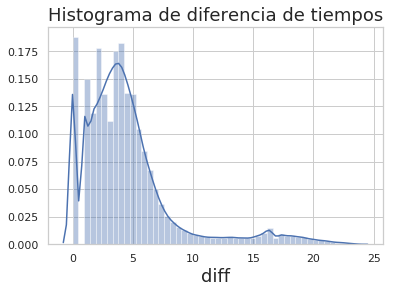

In [13]:
minidf = df.loc[(df['newperson'] == False) & (df['timediff'])]["timediff"]
minidf = np.log2(minidf)
print(minidf.describe())
print(minidf.value_counts())
g = sns.distplot(minidf)
g.set_title("Histograma de diferencia de tiempos", fontsize=18)
g.set_xlabel("diff",fontsize=18)
#tomamos minimo local antes del maximo local de las 24 horas como 2^14seg (14 en minidfs)
maxtime = 16368

In [14]:
df['viewed_product'] = (df['event'] == 'viewed product')
df['brand_listing'] = (df['event'] == 'brand listing')
df['visited_site'] = (df['event'] == 'visited site')
df['ad_campaign_hit'] = (df['event'] == 'ad campaign hit')
df['generic_listing'] = (df['event'] == 'generic listing')
df['searched_products'] = (df['event'] == 'searched products')
df['search_engine_hit'] = (df['event'] == 'search engine hit')
df['checkout'] = (df['event'] == 'checkout')
df['staticpage'] = (df['event'] == 'staticpage')
df['conversion'] = (df['event'] == 'conversion')
df['lead'] = (df['event'] == 'lead')
df['ad_url_model'] = ((df['url'].str.count('/') == 3) & (df['url'].str.contains('comprar')))
df['ad_url_brand'] = ((df['url'].str.count('/') == 2) & (df['url'].str.contains('comprar')))

In [15]:
df['newentry'] = ((df['timediff'] > maxtime) | (df['newperson']))
df['entry'] = df['newentry'].cumsum()
df['newentry'].value_counts()
df.loc[df['conversion']]
print(df[['entry', 'person', 'newperson']])

         entry    person  newperson
0            0  0004b0a2      False
1            0  0004b0a2      False
2            0  0004b0a2      False
3            0  0004b0a2      False
4            1  0006a21a       True
5            1  0006a21a      False
6            1  0006a21a      False
7            1  0006a21a      False
8            2  000a54b2       True
9            2  000a54b2      False
10           2  000a54b2      False
11           2  000a54b2      False
12           2  000a54b2      False
13           2  000a54b2      False
14           2  000a54b2      False
15           3  000a54b2      False
16           3  000a54b2      False
17           3  000a54b2      False
18           3  000a54b2      False
19           3  000a54b2      False
20           3  000a54b2      False
21           3  000a54b2      False
22           3  000a54b2      False
23           3  000a54b2      False
24           3  000a54b2      False
25           3  000a54b2      False
26           3  000a54b2    

In [16]:
def concatenar(serie):
    resul = str('')
    for i in serie:
        if not pd.isnull(i):
            resul = resul+str(i)
    return resul

def primero(serie):
    lista = []
    for i in serie:
        if not pd.isnull(i):
            lista.append(i)
            break
    if lista:
        return lista.pop(0)
    return np.nan

def listar(serie):
    lista = []
    for i in serie:
        if not pd.isnull(i):
            lista.append(i)
    if lista:
        return lista
    return np.nan

def logical_or(serie):
    resul = True
    for i in serie:
        resul = resul | i
    return resul
    
#print(df.columns)
print(primero([1,2,3]))
dict1 = ({'timestamp':primero, 'person':primero, 'sku':listar, 'model':listar, 'condition':listar,'storage':primero, 'color':listar, 'skus':listar, 
          'search_term':listar, 'staticpage':listar,'campaign_source':primero, 'search_engine':primero, 'channel':primero, 'new_vs_returning':primero,
          'city':primero, 'region':primero, 'country':primero, 'device_type':primero, 'screen_resolution':primero, 'operating_system_version':primero, 
          'browser_version':primero, 'day_of_week':primero, 'month':primero,'hour':primero, 'viewed_product':'sum', 'brand_listing':'sum',
          'visited_site':'sum', 'ad_campaign_hit':'sum', 'generic_listing':'sum','searched_products':'sum', 'search_engine_hit':'sum', 'checkout':'sum', 
          'conversion':'sum','lead':'sum', 'ad_url_model':'sum', 'ad_url_brand':'sum'})

dict1 = ({'timestamp':primero, 'person':primero, 'sku':listar, 'model':listar, 'condition':listar,'storage':primero, 'color':listar, 'skus':listar, 
          'search_term':listar, 'staticpage':'sum','campaign_source':primero, 'search_engine':primero, 'channel':primero, 'new_vs_returning':primero,
          'city':primero, 'region':primero, 'country':primero, 'device_type':primero, 'screen_resolution':primero, 'operating_system_version':primero, 
          'browser_version':primero, 'day_of_week':primero, 'month':primero,'hour':primero, 'viewed_product':'sum', 'brand_listing':'sum',
          'visited_site':'sum', 'ad_campaign_hit':'sum', 'generic_listing':'sum','searched_products':'sum', 'search_engine_hit':'sum', 'checkout':'sum', 
          'conversion':'sum','lead':'sum', 'ad_url_model':'sum', 'ad_url_brand':'sum', 'newperson':primero})
print('hola')

entrydf = df.groupby('entry').agg(dict1)
print (entrydf)
#print(entrydf.isna().sum())

def calcular_retencion(df):
    if df['conversion'] > 1:
        return 'multiple_conversions'
    
    if df['conversion'] > 0:
        return 'conversion'
    
    if df['checkout'] > 0:
        return 'checkout'
    
    if df['lead'] > 0:
        return 'lead'
    
    if df['searched_products'] > 0:
        return 'searched_products'
    
    if ((df['viewed_product'] > 0) & (df['ad_url_model'] == 0)) | (df['viewed_product'] > 1):
        return 'viewed_product'
    
    if ((df['brand_listing'] > 0) & (df['ad_url_brand'] == 0)) | (df['brand_listing'] > 1):
        return 'brand_listing'
    
    if df['generic_listing'] > 0:
        return 'generic_listing'
    
    if df['search_engine_hit'] > 0:
        return 'search_engine_hit'
    
    if df['visited_site'] > 0:
        return 'visited_site'
    
    return 'ad_campaing_hit' #el default es esto porque por algun motivo algunos logs que solo hacian ad_campaing_hit se quedaban sin esta columna
    
entrydf['retention'] = entrydf.apply(calcular_retencion, axis=1)

1
hola
                                                    skus   channel  \
entry                                                                
0                                                    NaN      Paid   
1                                                    NaN      Paid   
2      [10310,13333,13347,9902,9944,12774,12801,12744...      Paid   
3      [6649,7237,2820,2750,6707,6720,7224,12619,1260...      Paid   
4      [9959,102,10156,2719,10140,9974,10296,10323,11...   Organic   
5      [6248,13432,6944,192,2686,2830,3647,6023,6011,...    Direct   
6                                                    NaN       NaN   
7                                                    NaN      Paid   
8                                                    NaN   Organic   
9                                                    NaN      Paid   
10                                                   NaN      Paid   
11     [3889,3853,3961,7071,7083,7028,1429,4033,12674...    Direct   
12     [3853,

In [17]:
print(entrydf.isna().sum())
print(entrydf.loc[entrydf['retention'].isna()])

skus                        26620
channel                      1339
city                         1339
operating_system_version     1339
condition                    7656
region                       1339
month                           0
hour                            0
visited_site                    0
search_engine_hit               0
browser_version              1339
ad_campaign_hit                 0
device_type                  1339
conversion                      0
search_engine               42528
ad_url_brand                    0
generic_listing                 0
person                          0
newperson                       0
ad_url_model                    0
storage                      7656
country                      1339
lead                            0
brand_listing                   0
model                        7604
new_vs_returning             1339
color                        7656
sku                          7654
campaign_source             27818
screen_resolut

In [18]:
#entrydf['already_buyed'] = ()
print(entrydf['newperson'].value_counts())
df['newperson'].value_counts()

False    44574
True     27623
Name: newperson, dtype: int64


False    983665
True      27623
Name: newperson, dtype: int64

In [19]:
def ya_compro(df):
    lista = []
    for i in range(1, len(df.index)):
        lista[i] = (df['conversion'][i] > 0)
    for i in range(1, len(df.index)):
        lista[i] = (lista[i-1]) & (not df['newperson'][i])
    return lista

entrydf['already_buyed'] = (entrydf['conversion'] > 0)
entrydf['already_buyed'] = entrydf.groupby('person')['already_buyed'].cumsum()
entrydf['already_buyed'] = (entrydf['already_buyed'] > 0) & (entrydf['already_buyed'].shift(1) > 0)
entrydf['first_convertion'] = ((entrydf['retention'] == 'conversion') | (entrydf['retention'] == 'multiple_conversions')) & (entrydf['already_buyed'] == False)

entrydf.loc[entrydf['person'] == '00204059']
entrydf.loc[(entrydf['first_convertion'] == True)]

,skus,channel,city,operating_system_version,condition,region,month,hour,visited_site,search_engine_hit,...,checkout,search_term,viewed_product,timestamp,searched_products,day_of_week,staticpage,retention,already_buyed,first_convertion
entry,,,,,,,,,,,,,,,,,,,,,
20,NaN,NaN,NaN,NaN,[Muito Bom],NaN,3,17,0.00,0.00,...,0.00,NaN,0.00,2018-03-20 17:46:12,0.00,1,0.00,conversion,False,True
187,"[6635,2820,6706,2750,6721,12618,7237,7251,2773...",Direct,Belém,Windows XP,"[Bom, Excelente, Muito Bom, Excelente, Excelen...",Para,4,19,2.00,1.00,...,4.00,NaN,10.00,2018-04-26 19:58:23,0.00,3,1.00,conversion,False,True
215,"[6636,6593,7253,7239,7225,2820,2750,6707,12604...",NaN,NaN,NaN,[Muito Bom],NaN,6,14,0.00,0.00,...,0.00,NaN,0.00,2018-06-10 14:37:50,0.00,6,0.00,conversion,False,True
287,NaN,Paid,Unknown,Windows 10,"[Bom, Bom, Bom, Bom]",Unknown,3,13,1.00,0.00,...,1.00,NaN,2.00,2018-03-16 13:39:14,0.00,4,0.00,conversion,False,True
435,"[3191,6819,2783,8135,823,2725,12436,4477,2782,...",Paid,Jundiaí,Android 4.4.4,"[Bom, Bom, Bom, Bom, Bom, Bom, Muito Bom, Bom,...",Sao Paulo,2,20,2.00,0.00,...,2.00,NaN,17.00,2018-02-09 20:29:56,0.00,4,2.00,conversion,False,True
666,NaN,NaN,NaN,NaN,[Bom],NaN,5,2,0.00,0.00,...,0.00,NaN,0.00,2018-05-17 02:20:29,0.00,3,0.00,conversion,False,True
963,"[10114,10156,10126,3853,7126,11276,7140,9902,9...",Paid,São Paulo,Windows 10,"[Muito Bom, Excelente, Muito Bom, Excelente, M...",Sao Paulo,1,16,1.00,1.00,...,1.00,NaN,59.00,2018-01-09 16:37:50,0.00,1,0.00,conversion,False,True
1048,"[6594,6664,6649,7251,1061,2750,6719,7238,723,2...",Direct,Vitória,Windows 7,[Excelente],Espirito Santo,5,2,1.00,0.00,...,0.00,NaN,0.00,2018-05-15 02:31:34,0.00,1,0.00,conversion,False,True
1152,"[3889,3853,3961,3769,1429,4033,14201,12674,142...",Direct,Unknown,Android 7,"[Bom, Excelente, Excelente, Muito Bom, Bom, Ex...",Unknown,1,17,3.00,2.00,...,2.00,NaN,63.00,2018-01-23 17:23:07,0.00,1,0.00,conversion,False,True


In [20]:
print(entrydf.columns)

Index(['skus', 'channel', 'city', 'operating_system_version', 'condition',
       'region', 'month', 'hour', 'visited_site', 'search_engine_hit',
       'browser_version', 'ad_campaign_hit', 'device_type', 'conversion',
       'search_engine', 'ad_url_brand', 'generic_listing', 'person',
       'newperson', 'ad_url_model', 'storage', 'country', 'lead',
       'brand_listing', 'model', 'new_vs_returning', 'color', 'sku',
       'campaign_source', 'screen_resolution', 'checkout', 'search_term',
       'viewed_product', 'timestamp', 'searched_products', 'day_of_week',
       'staticpage', 'retention', 'already_buyed', 'first_convertion'],
      dtype='object')
